In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Steps
 - Preprocess + EDA + Feature Selection
 - Extract input and output cells
 - Scale the values
 - Train test split
 - Train the model
 - Evaluate the model/ model selection
 - Deploy the model

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


## Remove the unwanted columns

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['cgpa', 'iq', 'placement'], dtype='object')

# Visulisation

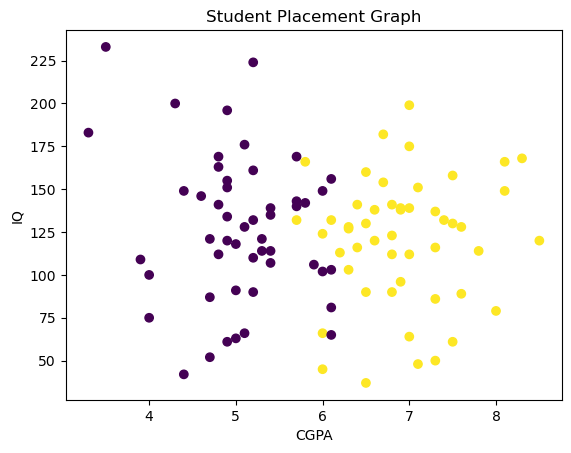

In [7]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Student Placement Graph')
plt.show()


In [8]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

# Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Train

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# MODEL TRAINING
Model_trained = clf.fit(X_train,Y_train)

# Evalute
Model_prediction = clf.predict(X_test)
Model_prediction

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [12]:
Y_test

7     0
62    0
95    0
82    1
38    1
81    0
17    0
96    0
86    0
32    1
Name: placement, dtype: int64

### Here we can see that our model give three wrong answers, this is the mannual way to check what if the data is too big then we cannot do this, so we can use skitlearn

# Evalution by Skitlearn

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Model_prediction)

0.9

### To see what patteren Our Model Made

In [15]:
! pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 9.0 MB/s eta 0:00:00


<Axes: >

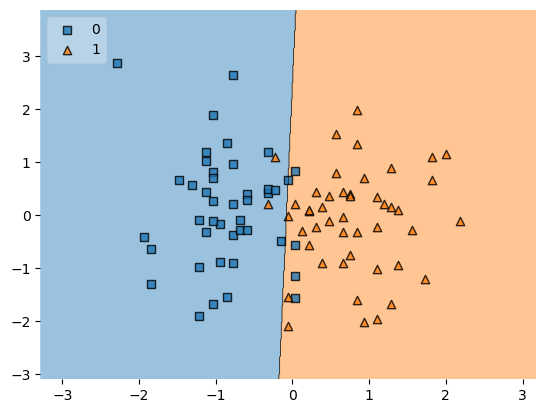

In [18]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

## Now we pick our Model For Deployment

In [19]:
import pickle

In [21]:
pickle.dump(clf,open('PlacementPredictor.pkl','wb'))